可視化帕默群島企鵝數據

## 分析目標

此數據分析目的是對帕默群島上企鵝樣本的相關變量進行可視化，從而探索和分析種類、性別、所在島嶼等因素，與企鵝的身體屬性，包括體重、嘴峰長度和深度、鰭的長度等，之間的關係。

## 簡介

原始數據`Penguins.csv`包括334個收集自南極洲帕默群島的3個島上的企鵝樣本，以及相關屬性數據，包括種類名、所在島、嘴峰長度、嘴峰深度、鰭長度、體重及性別。

`Penguins.csv`每列的涵義如下：
- species：企鵝的種類
- island：企鵝所在島嶼
- culmen_length_mm：企鵝嘴峰長度（單位為毫米）
- culmen_depth_mm：企鵝嘴峰深度（單位為毫米）
- flipper_length_mm：企鵝鰭長度（單位為毫米）
- body_mass_g：企鵝體重（單位為克）
- sex：企鵝性別

## 讀取數據

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

## 評估和清理數據

In [ ]:
# 針對原始數據進行結構和內容的清理，重點是要整齊且乾淨。
# 數據的結構性問題是指數據要符合每個變量為一列，每個觀察值為一行，每種類型的觀察單位為一個表格；數據的內容性問題是指丟失數據、重複數據及無效數據等。
# 不變更原本資料，新增cleaned_data存取清理後資料。

In [ ]:
cleaned_data = original_data.copy()

In [ ]:
# 數據整齊度

In [ ]:
cleaned_data.head(10)

In [ ]:
# 以前十項數據看來，此數據符合每個變量為一列，每個觀察值為一行，每種類型的觀察單位為一個表格，因此不存在結構性問題。

In [ ]:
# 數據乾淨度

In [ ]:
cleaned_data.info()

In [ ]:
# 從輸出結果來看，應有344項資料，其中culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g及sex皆有遺漏值。
# 且已知species(企鵝種類)island(企鵝所在島嶼)sex(企鵝性別)皆為分類數據，因此將數據類型轉為Category。

In [ ]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [ ]:
# 處理遺漏數據
# 首先觀察遺漏數據

In [ ]:
cleaned_data.query("culmen_length_mm.isna()")

In [ ]:
cleaned_data.query("culmen_depth_mm.isna()")

In [ ]:
cleaned_data.query("flipper_length_mm.isna()")

In [ ]:
cleaned_data.query("body_mass_g.isna()")

In [ ]:
# 以輸出結果看來culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g的遺漏值皆為索引3及339，因此直接刪除此兩項索引即可。

In [ ]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

In [ ]:
cleaned_data.info()

In [ ]:
cleaned_data.query("sex.isna()")

In [ ]:
# 由於Pandas、Matplotlib及Seaborn皆會自動忽略遺漏值，且其餘數據皆有分析價值，因此選擇保留上述列。

In [ ]:
# 以此案例來看，皆允許重複值的存在，因此不作重複值處理。
# 分類變量中會存在不一致數據，觀察是否存在不同值實際代表同一目標的情形。

In [37]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [38]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [39]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [40]:
# 可以看見species及island數據正常，而sex有英文句號，應變更為NaN空值

In [43]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

In [44]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

## 檢查是否含有無效或錯誤數據

In [45]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## 探索數據

In [46]:
sns.set_palette("pastel")

In [47]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 企鵝種類比例

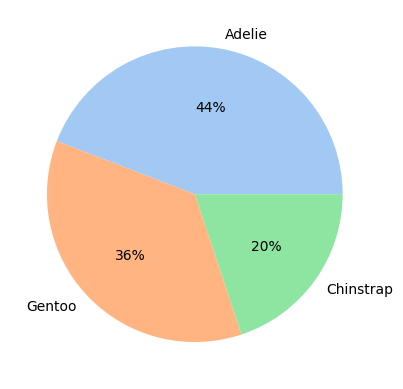

In [48]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

In [49]:
# 數據顯示Adelie占比最大，其次為Gentoo，最少為Chinstrap僅占20%，為五分之一。

## 企鵝所屬島嶼比例

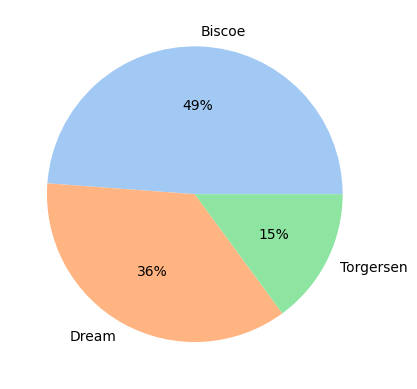

In [50]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

In [51]:
#數據顯示近一半的企鵝來自Biscoe，其次為Dream占了36%，Torgersen最少。

## 企鵝性別比例

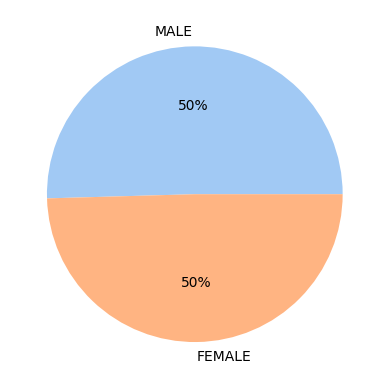

In [52]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

In [53]:
# 符合隨機抽樣結果

## 各島嶼上的企鵝種類數量

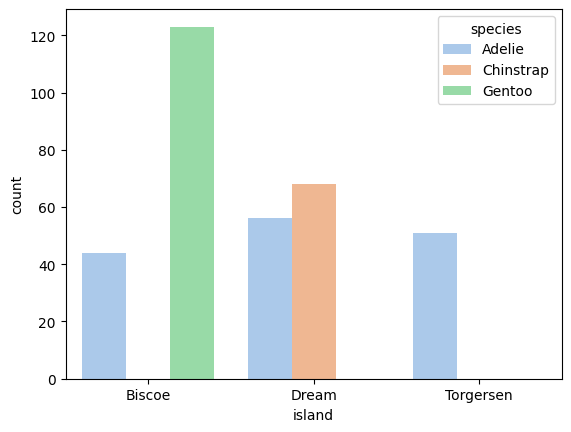

In [54]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

In [56]:
# 透過數據樣本可以看見，Gentoo僅出自Biscoe島嶼，Chinstrap僅來自Dream島嶼，三個島嶼上皆有Adelie企鵝。

## 各島嶼上的企鵝性別數量

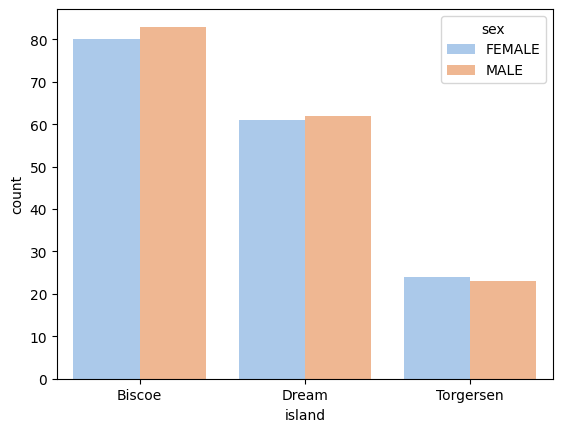

In [57]:
sns.countplot(cleaned_data, x='island', hue='sex')
plt.show()

## 查看數值間的相關關係

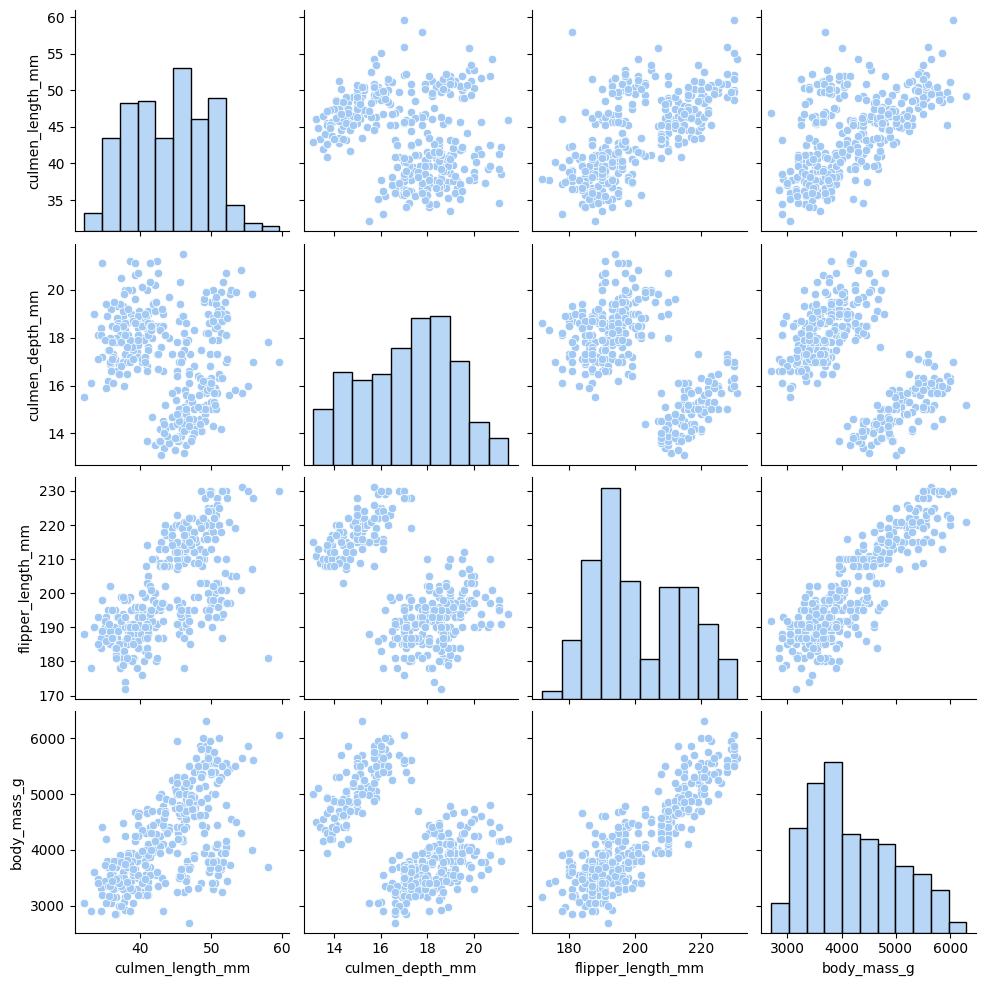

In [58]:
sns.pairplot(cleaned_data)
plt.show()

In [62]:
# 給散點圖分群加上線性回歸線及透明度，方便分辨結果

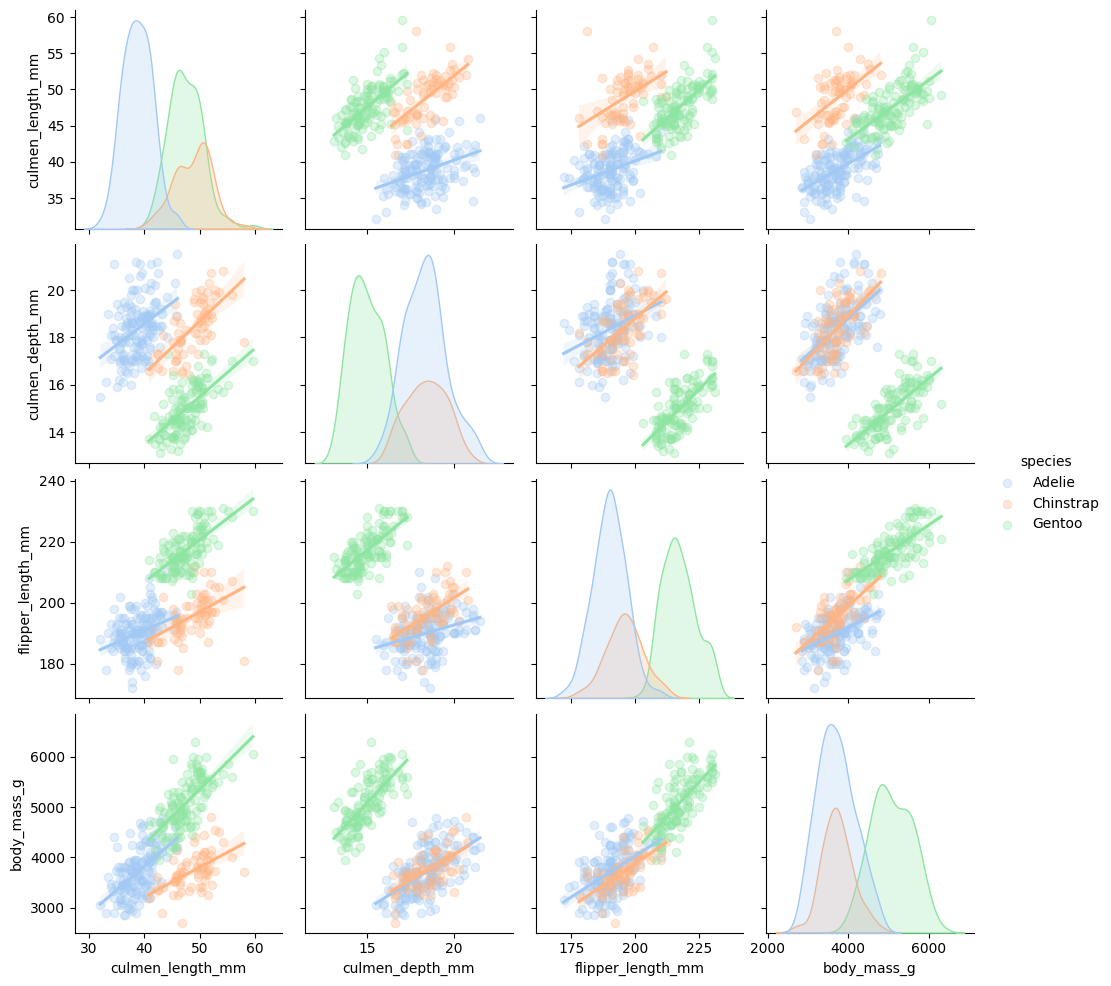

In [59]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

In [63]:
# 可以看見同類企鵝的屬性數據之間均呈線性正相關，即嘴峰越長，嘴峰越深，鳍越長，體重越重，嘴峰越短，嘴峰越淺，鳍越短，體重越輕。

In [65]:
cleaned_data.to_csv("cleaned_data.csv", index=False)